In [1]:
import sys
import os
import time

from asym_minhash import AsymmetricMinwiseHasher
from filehandling import load_data, file2set
from partitioned_asym_mh import PartitionedAsymMH
from partitioning import equalWidthPartition, equalDepthPartition, paddingMinimizingPartition
from topk_search import top_k_search_amh, top_k_search_baseline

In [2]:
# data_dir = "/Users/mandar/Documents/College/CSC200H/FinalProject/sets"
data_dir = "../datasets"

In [3]:
b = 40
r = 4
k = 10

In [4]:
data, vocabulary = load_data(data_dir)

Loading data from: ../datasets
Number of sets loaded: 2000
Vocabulary size: 81063


In [5]:
queries0 = "../queries/0.interval"
queries1 = "../queries/1.interval"
queries2 = "../queries/2.interval"
queries3 = "../queries/3.interval"

In [6]:
# Load AMH
amh = AsymmetricMinwiseHasher(data, b, r, minhashfile="asym_mh_hashes", vocab=vocabulary, load_sigs="asym_mh_signatures.json")

AMH: Padding sets
AMH: Initializing minhash with padded sets; given hashes.
MH: Vocabulary given. No need to compute.
MH: Loading hashes.
AMH: Getting signatures of all padded sets.
MH: Generating all signatures...
MH: 0 done. 2000 left.
MH: 100 done. 1900 left.
MH: 200 done. 1800 left.
MH: 300 done. 1700 left.
MH: 400 done. 1600 left.
MH: 500 done. 1500 left.
MH: 600 done. 1400 left.
MH: 700 done. 1300 left.
MH: 800 done. 1200 left.
MH: 900 done. 1100 left.
MH: 1000 done. 1000 left.
MH: 1100 done. 900 left.
MH: 1200 done. 800 left.
MH: 1300 done. 700 left.
MH: 1400 done. 600 left.
MH: 1500 done. 500 left.
MH: 1600 done. 400 left.
MH: 1700 done. 300 left.
MH: 1800 done. 200 left.
MH: 1900 done. 100 left.
MH: Done generating. Writing to file asym_mh_signatures.json
MH: Done writing signatures.
AMH: Building LSH index on padded sets.


In [7]:
# Load PAMH: equi-depth
pamh_ed = PartitionedAsymMH(data, b, r, equalDepthPartition, 3, minhashfile="asym_mh_hashes", load_sigs_pfx="pamh_3_edepth/sigs_part")

PAMH: Partitioning sets.
PAMH: Initializing AMH for part number 0
AMH: Padding sets
AMH: Initializing minhash with padded sets; given hashes.
MH: Vocabulary given. No need to compute.
MH: Loading hashes.
AMH: Getting signatures of all padded sets.
MH: Generating all signatures...
MH: 0 done. 667 left.
MH: 100 done. 567 left.
MH: 200 done. 467 left.
MH: 300 done. 367 left.
MH: 400 done. 267 left.
MH: 500 done. 167 left.
MH: 600 done. 67 left.
MH: Done generating. Writing to file pamh_3_edepth/sigs_part0.json
MH: Done writing signatures.
AMH: Building LSH index on padded sets.
PAMH: Initializing AMH for part number 1
AMH: Padding sets
AMH: Initializing minhash with padded sets; given hashes.
MH: Vocabulary given. No need to compute.
MH: Loading hashes.
AMH: Getting signatures of all padded sets.
MH: Generating all signatures...
MH: 0 done. 667 left.
MH: 100 done. 567 left.
MH: 200 done. 467 left.
MH: 300 done. 367 left.
MH: 400 done. 267 left.
MH: 500 done. 167 left.
MH: 600 done. 67 lef

In [8]:
# Load PAMH: equi-width
pamh_ew = PartitionedAsymMH(data, b, r, equalWidthPartition, 3, minhashfile="asym_mh_hashes", load_sigs_pfx="pamh_3_ewidth/sigs_part")

PAMH: Partitioning sets.
PAMH: Initializing AMH for part number 0
AMH: Padding sets
AMH: Initializing minhash with padded sets; given hashes.
MH: Vocabulary given. No need to compute.
MH: Loading hashes.
AMH: Getting signatures of all padded sets.
MH: Generating all signatures...
MH: 0 done. 1992 left.
MH: 100 done. 1892 left.
MH: 200 done. 1792 left.
MH: 300 done. 1692 left.
MH: 400 done. 1592 left.
MH: 500 done. 1492 left.
MH: 600 done. 1392 left.
MH: 700 done. 1292 left.
MH: 800 done. 1192 left.
MH: 900 done. 1092 left.
MH: 1000 done. 992 left.
MH: 1100 done. 892 left.
MH: 1200 done. 792 left.
MH: 1300 done. 692 left.
MH: 1400 done. 592 left.
MH: 1500 done. 492 left.
MH: 1600 done. 392 left.
MH: 1700 done. 292 left.
MH: 1800 done. 192 left.
MH: 1900 done. 92 left.
MH: Done generating. Writing to file pamh_3_ewidth/sigs_part0.json
MH: Done writing signatures.
AMH: Building LSH index on padded sets.
PAMH: Initializing AMH for part number 1
AMH: Padding sets
AMH: Initializing minhash w

In [9]:
# Load PAMH: our partition
pamh_op = PartitionedAsymMH(data, b, r, paddingMinimizingPartition, 3, minhashfile="asym_mh_hashes", load_sigs_pfx="pamh_3_ourpart/sigs_part")

PAMH: Partitioning sets.
[0, 1841, 1978, 2000]
PAMH: Initializing AMH for part number 0
AMH: Padding sets
AMH: Initializing minhash with padded sets; given hashes.
MH: Vocabulary given. No need to compute.
MH: Loading hashes.
AMH: Getting signatures of all padded sets.
MH: Generating all signatures...
MH: 0 done. 1841 left.
MH: 100 done. 1741 left.
MH: 200 done. 1641 left.
MH: 300 done. 1541 left.
MH: 400 done. 1441 left.
MH: 500 done. 1341 left.
MH: 600 done. 1241 left.
MH: 700 done. 1141 left.
MH: 800 done. 1041 left.
MH: 900 done. 941 left.
MH: 1000 done. 841 left.
MH: 1100 done. 741 left.
MH: 1200 done. 641 left.
MH: 1300 done. 541 left.
MH: 1400 done. 441 left.
MH: 1500 done. 341 left.
MH: 1600 done. 241 left.
MH: 1700 done. 141 left.
MH: 1800 done. 41 left.
MH: Done generating. Writing to file pamh_3_ourpart/sigs_part0.json
MH: Done writing signatures.
AMH: Building LSH index on padded sets.
PAMH: Initializing AMH for part number 1
AMH: Padding sets
AMH: Initializing minhash with

In [25]:
# Evaluation function
def evaluate(amher, qfilename):
    q_files = [x for x in open(qfilename, 'r').read().split('\n') if x != ""]
    q_sets = [file2set(os.path.join(data_dir, x)) for x in q_files]
    
    precision_avg = 0
    recall_avg = 0
    time_avg = 0
    bf_time_avg = 0
    
    for i in range(len(q_sets)):
        q = q_sets[i]
        print('Evaluating', q_files[i])
        
        start = time.time()
        amh_sol = top_k_search_amh(q, amher, k, data)
        end = time.time()
        time_avg += end - start
        
        start = time.time()
        base_sol = top_k_search_baseline(q, data, k)
        end = time.time()
        bf_time_avg += end - start
        
        base_set = set([x[0] for x in base_sol])
        amh_set = set([x[0] for x in amh_sol])
        
        true_pos = len(base_set.intersection(amh_set))
        false_pos = len(amh_set - base_set)
        false_neg = len(base_set - amh_set)
        if true_pos + false_pos > 0:
            precision_avg += true_pos / (true_pos + false_pos)
        else:
            precision_avg += 1
        recall_avg += true_pos / (true_pos + false_neg)
        
    precision_avg /= len(q_sets)
    recall_avg /= len(q_sets)
    time_avg /= len(q_sets)
    bf_time_avg /= len(q_sets)
    
    return precision_avg, recall_avg, time_avg, bf_time_avg

In [30]:
# Run each AMH top-k search, compute average precision/recall
amh_0 = evaluate(amh, queries0)
print('-------------------------')
amh_1 = evaluate(amh, queries1)
print('-------------------------')
amh_2 = evaluate(amh, queries2)
print('-------------------------')
amh_3 = evaluate(amh, queries3)

Evaluating 22ew-dxez#8.txt
Evaluating 22g3-z7e7#1.txt
Evaluating 23z9-6uk9#13.txt
Evaluating 23z9-6uk9#39.txt
Evaluating 24a4-muw7#0.txt
Evaluating 24a8-ex6a#33.txt
Evaluating 24uj-dj8v#15.txt
Evaluating 265m-q8pf#1.txt
Evaluating 265m-q8pf#2.txt
Evaluating 26hs-mxmu#17.txt
Evaluating 26hs-mxmu#20.txt
Evaluating 26pv-trba#1.txt
Evaluating 26vn-bxnb#3.txt
Evaluating 27fu-vtvd#1.txt
Evaluating 28fr-iqnx#2.txt
Evaluating 292v-tb9r#2.txt
Evaluating 2976-zu3f#3.txt
Evaluating 2b3e-t2e7#4.txt
Evaluating 2b3m-wnm2#1.txt
Evaluating 2b3m-wnm2#2.txt
Evaluating 2b3m-wnm2#3.txt
Evaluating 2b9e-mbxk#12.txt
Evaluating 2b9e-mbxk#2.txt
Evaluating 2bnn-yakx#18.txt
Evaluating 2bnn-yakx#2.txt
-------------------------
Evaluating 22hw-wgp8#0.txt
Evaluating 2cie-ugkk#0.txt
Evaluating 2ft4-4uik#0.txt
Evaluating 2g5r-pikx#0.txt
Evaluating 2g8e-tamb#0.txt
Evaluating 2ncr-4kkv#0.txt
Evaluating 2ni9-dqsi#0.txt
Evaluating 2p74-z6sq#10.txt
Evaluating 2sxq-n8zu#0.txt
Evaluating 2wgt-bc53#4.txt
Evaluating 36bx-m8s4

In [40]:
amh_results = (amh_0, amh_1, amh_2, amh_3)

In [33]:
# Run each PAMH equi-depth search, compute average precision/recall
pamh_ed_0 = evaluate(pamh_ed, queries0)
print('-------------------------')
pamh_ed_1 = evaluate(pamh_ed, queries1)
print('-------------------------')
pamh_ed_2 = evaluate(pamh_ed, queries2)
print('-------------------------')
pamh_ed_3 = evaluate(pamh_ed, queries3)

Evaluating 22ew-dxez#8.txt
Evaluating 22g3-z7e7#1.txt
Evaluating 23z9-6uk9#13.txt
Evaluating 23z9-6uk9#39.txt
Evaluating 24a4-muw7#0.txt
Evaluating 24a8-ex6a#33.txt
Evaluating 24uj-dj8v#15.txt
Evaluating 265m-q8pf#1.txt
Evaluating 265m-q8pf#2.txt
Evaluating 26hs-mxmu#17.txt
Evaluating 26hs-mxmu#20.txt
Evaluating 26pv-trba#1.txt
Evaluating 26vn-bxnb#3.txt
Evaluating 27fu-vtvd#1.txt
Evaluating 28fr-iqnx#2.txt
Evaluating 292v-tb9r#2.txt
Evaluating 2976-zu3f#3.txt
Evaluating 2b3e-t2e7#4.txt
Evaluating 2b3m-wnm2#1.txt
Evaluating 2b3m-wnm2#2.txt
Evaluating 2b3m-wnm2#3.txt
Evaluating 2b9e-mbxk#12.txt
Evaluating 2b9e-mbxk#2.txt
Evaluating 2bnn-yakx#18.txt
Evaluating 2bnn-yakx#2.txt
-------------------------
Evaluating 22hw-wgp8#0.txt
Evaluating 2cie-ugkk#0.txt
Evaluating 2ft4-4uik#0.txt
Evaluating 2g5r-pikx#0.txt
Evaluating 2g8e-tamb#0.txt
Evaluating 2ncr-4kkv#0.txt
Evaluating 2ni9-dqsi#0.txt
Evaluating 2p74-z6sq#10.txt
Evaluating 2sxq-n8zu#0.txt
Evaluating 2wgt-bc53#4.txt
Evaluating 36bx-m8s4

In [41]:
p_ed_results = (pamh_ed_0, pamh_ed_1, pamh_ed_2, pamh_ed_3)

In [35]:
# Run each PAMH equi-width search, compute average precision/recall
pamh_ew_0 = evaluate(pamh_ew, queries0)
print('-------------------------')
pamh_ew_1 = evaluate(pamh_ew, queries1)
print('-------------------------')
pamh_ew_2 = evaluate(pamh_ew, queries2)
print('-------------------------')
pamh_ew_3 = evaluate(pamh_ew, queries3)

Evaluating 22ew-dxez#8.txt
Evaluating 22g3-z7e7#1.txt
Evaluating 23z9-6uk9#13.txt
Evaluating 23z9-6uk9#39.txt
Evaluating 24a4-muw7#0.txt
Evaluating 24a8-ex6a#33.txt
Evaluating 24uj-dj8v#15.txt
Evaluating 265m-q8pf#1.txt
Evaluating 265m-q8pf#2.txt
Evaluating 26hs-mxmu#17.txt
Evaluating 26hs-mxmu#20.txt
Evaluating 26pv-trba#1.txt
Evaluating 26vn-bxnb#3.txt
Evaluating 27fu-vtvd#1.txt
Evaluating 28fr-iqnx#2.txt
Evaluating 292v-tb9r#2.txt
Evaluating 2976-zu3f#3.txt
Evaluating 2b3e-t2e7#4.txt
Evaluating 2b3m-wnm2#1.txt
Evaluating 2b3m-wnm2#2.txt
Evaluating 2b3m-wnm2#3.txt
Evaluating 2b9e-mbxk#12.txt
Evaluating 2b9e-mbxk#2.txt
Evaluating 2bnn-yakx#18.txt
Evaluating 2bnn-yakx#2.txt
-------------------------
Evaluating 22hw-wgp8#0.txt
Evaluating 2cie-ugkk#0.txt
Evaluating 2ft4-4uik#0.txt
Evaluating 2g5r-pikx#0.txt
Evaluating 2g8e-tamb#0.txt
Evaluating 2ncr-4kkv#0.txt
Evaluating 2ni9-dqsi#0.txt
Evaluating 2p74-z6sq#10.txt
Evaluating 2sxq-n8zu#0.txt
Evaluating 2wgt-bc53#4.txt
Evaluating 36bx-m8s4

In [42]:
p_ew_results = (pamh_ew_0, pamh_ew_1, pamh_ew_2, pamh_ew_3)

In [37]:
# Run each PAMH our partition search, compute average precision/recall
pamh_op_0 = evaluate(pamh_op, queries0)
print('-------------------------')
pamh_op_1 = evaluate(pamh_op, queries1)
print('-------------------------')
pamh_op_2 = evaluate(pamh_op, queries2)
print('-------------------------')
pamh_op_3 = evaluate(pamh_op, queries3)

Evaluating 22ew-dxez#8.txt
Evaluating 22g3-z7e7#1.txt
Evaluating 23z9-6uk9#13.txt
Evaluating 23z9-6uk9#39.txt
Evaluating 24a4-muw7#0.txt
Evaluating 24a8-ex6a#33.txt
Evaluating 24uj-dj8v#15.txt
Evaluating 265m-q8pf#1.txt
Evaluating 265m-q8pf#2.txt
Evaluating 26hs-mxmu#17.txt
Evaluating 26hs-mxmu#20.txt
Evaluating 26pv-trba#1.txt
Evaluating 26vn-bxnb#3.txt
Evaluating 27fu-vtvd#1.txt
Evaluating 28fr-iqnx#2.txt
Evaluating 292v-tb9r#2.txt
Evaluating 2976-zu3f#3.txt
Evaluating 2b3e-t2e7#4.txt
Evaluating 2b3m-wnm2#1.txt
Evaluating 2b3m-wnm2#2.txt
Evaluating 2b3m-wnm2#3.txt
Evaluating 2b9e-mbxk#12.txt
Evaluating 2b9e-mbxk#2.txt
Evaluating 2bnn-yakx#18.txt
Evaluating 2bnn-yakx#2.txt
-------------------------
Evaluating 22hw-wgp8#0.txt
Evaluating 2cie-ugkk#0.txt
Evaluating 2ft4-4uik#0.txt
Evaluating 2g5r-pikx#0.txt
Evaluating 2g8e-tamb#0.txt
Evaluating 2ncr-4kkv#0.txt
Evaluating 2ni9-dqsi#0.txt
Evaluating 2p74-z6sq#10.txt
Evaluating 2sxq-n8zu#0.txt
Evaluating 2wgt-bc53#4.txt
Evaluating 36bx-m8s4

In [46]:
p_op_results = (pamh_op_0, pamh_op_1, pamh_op_2, pamh_op_3)

In [47]:
# Results are all of the form precision, recall, query time, baseline time

# Precision
amh_prec = [x[0] for x in amh_results]
p_ed_prec = [x[0] for x in p_ed_results]
p_ew_prec = [x[0] for x in p_ew_results]
p_op_prec = [x[0] for x in p_op_results]

# Recall
amh_rec = [x[1] for x in amh_results]
p_ed_rec = [x[1] for x in p_ed_results]
p_ew_rec = [x[1] for x in p_ew_results]
p_op_rec = [x[1] for x in p_op_results]

# Query Time
amh_time = [x[2] for x in amh_results]
p_ed_time = [x[2] for x in p_ed_results]
p_ew_time = [x[2] for x in p_ew_results]
p_op_time = [x[2] for x in p_op_results]

In [49]:
# Plot
import pandas as pd

<AxesSubplot:xlabel='Query Size Interval', ylabel='Average Precision'>

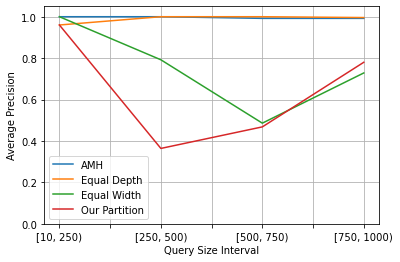

In [66]:
# Precision
pd.Series(amh_prec, ['[10, 250)','[250, 500)','[500, 750)','[750, 1000)'], name="AMH").plot(ylim=(0,1.05), grid=True, legend=True, xlabel='Query Size Interval', ylabel='Average Precision')
pd.Series(p_ed_prec, ['[10, 250)','[250, 500)','[500, 750)','[750, 1000)'], name="Equal Depth").plot(grid=True, legend=True)
pd.Series(p_ew_prec, ['[10, 250)','[250, 500)','[500, 750)','[750, 1000)'], name="Equal Width").plot(grid=True, legend=True)
pd.Series(p_op_prec, ['[10, 250)','[250, 500)','[500, 750)','[750, 1000)'], name="Our Partition").plot(grid=True, legend=True)

<AxesSubplot:xlabel='Query Size Interval', ylabel='Average Recall'>

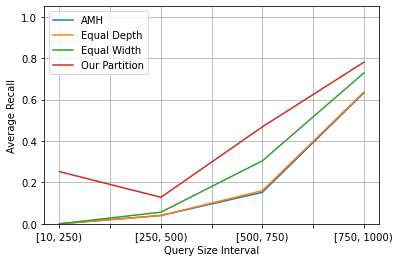

In [67]:
# Recall
pd.Series(amh_rec, ['[10, 250)','[250, 500)','[500, 750)','[750, 1000)'], name="AMH").plot(ylim=(0,1.05), grid=True, legend=True, xlabel='Query Size Interval', ylabel='Average Recall')
pd.Series(p_ed_rec, ['[10, 250)','[250, 500)','[500, 750)','[750, 1000)'], name="Equal Depth").plot(grid=True, legend=True)
pd.Series(p_ew_rec, ['[10, 250)','[250, 500)','[500, 750)','[750, 1000)'], name="Equal Width").plot(grid=True, legend=True)
pd.Series(p_op_rec, ['[10, 250)','[250, 500)','[500, 750)','[750, 1000)'], name="Our Partition").plot(grid=True, legend=True)

<AxesSubplot:xlabel='Query Size Interval', ylabel='Average Query Time (seconds)'>

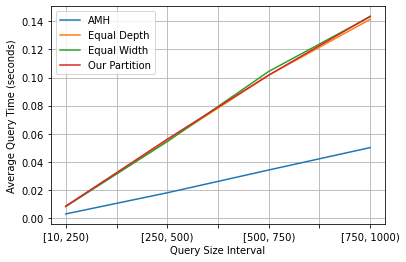

In [71]:
# Query Time
pd.Series(amh_time, ['[10, 250)','[250, 500)','[500, 750)','[750, 1000)'], name="AMH").plot(grid=True, legend=True, xlabel='Query Size Interval', ylabel='Average Query Time (seconds)')
pd.Series(p_ed_time, ['[10, 250)','[250, 500)','[500, 750)','[750, 1000)'], name="Equal Depth").plot(grid=True, legend=True)
pd.Series(p_ew_time, ['[10, 250)','[250, 500)','[500, 750)','[750, 1000)'], name="Equal Width").plot(grid=True, legend=True)
pd.Series(p_op_time, ['[10, 250)','[250, 500)','[500, 750)','[750, 1000)'], name="Our Partition").plot(grid=True, legend=True)